In [91]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualizacion
import matplotlib.pyplot as plt             #visualizacion
%matplotlib inline     
sns.set(color_codes=True)

#importamos el dataframe
df = pd.read_csv(
    'incomedata.csv',
    sep=',',
    index_col=0
    )

In [92]:
df.head()

,provlab,prov,ac,gen,age,nat,educ,labor,age2,age3,...,age5,educ1,educ2,educ3,nat1,labor1,labor2,labor3,income,weight
1,Alava,1,16,2,5,2,2,3,0,0,...,1,0,1,0,0,0,0,1,12021.832116,2804.031333
2,Alava,1,16,1,3,1,2,1,0,1,...,0,0,1,0,1,1,0,0,8609.853817,1347.639615
3,Alava,1,16,1,5,1,2,1,0,0,...,1,0,1,0,1,1,0,0,3384.197292,2568.176149
4,Alava,1,16,1,5,1,0,0,0,0,...,1,0,0,0,1,0,0,0,2343.355200,1168.233266
5,Alava,1,16,1,3,1,1,1,0,1,...,0,1,0,0,1,1,0,0,9023.845796,953.438826


Al dividir una variable predictora que tiene q posibles valores, hay 2^(q-1)-1 particiones posibles de los q valores  en dos grupos, volviéndose los cálculos demasiado costosos para q grandes. Sin embargo, si solo tomasen valores 0-1
este cálculo se simplificaría. Por tanto, para facilitar la partición binaria recursiva, nos quedamos con las variables predictorias binarias 0-1 en el caso de la edad, la educación.
Sin embargo, nos quedaremos con la variable 'labor' ya que esta incluye también información sobre la edad y la educación, no recogida en sus correspondientes variables binarias.
También vamos a eliminar la variable 'nat1', ya que su misma información está en la variable 'nat'.
También se va a eliminar la variable 'provlab', ya que su información está contenida en la variable 'prov'.

In [123]:
dfn = df.drop(['provlab','age', 'educ', 'labor1', 'labor2', 'labor3', 'nat1'], axis=1)

In [124]:
dfn.head()

,prov,ac,gen,nat,labor,age2,age3,age4,age5,educ1,educ2,educ3,income,weight
1,1,16,2,2,3,0,0,0,1,0,1,0,12021.832116,2804.031333
2,1,16,1,1,1,0,1,0,0,0,1,0,8609.853817,1347.639615
3,1,16,1,1,1,0,0,0,1,0,1,0,3384.197292,2568.176149
4,1,16,1,1,0,0,0,0,1,0,0,0,2343.355200,1168.233266
5,1,16,1,1,1,0,1,0,0,1,0,0,9023.845796,953.438826


In [125]:
dfn.dtypes

prov        int64
ac          int64
gen         int64
nat         int64
labor       int64
age2        int64
age3        int64
age4        int64
age5        int64
educ1       int64
educ2       int64
educ3       int64
income    float64
weight    float64
dtype: object

In [126]:
dfn.shape

(17199, 14)

Nuestro dataframe tiene 17199 filas y 18 variables, pero puede que tengamos datos missing y duplicados.

In [127]:
dfn.isna().sum()

prov      0
ac        0
gen       0
nat       0
labor     0
age2      0
age3      0
age4      0
age5      0
educ1     0
educ2     0
educ3     0
income    0
weight    0
dtype: int64

Vemos que noy hay datos missing en nuestro dataframe, por tanto no tenemos que hacer ninguna imputación.

In [128]:
dfn[dfn.duplicated()].shape

(0, 14)

No tenemos ningún dato duplicado.

Veamos ahora distintos estadísticos descriptivos de nuestras variables de interés.

In [129]:
dfn.describe()

,prov,ac,gen,nat,labor,age2,age3,age4,age5,educ1,educ2,educ3,income,weight
count,17199.000000,17199.000000,17199.000000,17199.00000,17199.000000,17199.000000,17199.000000,17199.000000,17199.000000,17199.000000,17199.000000,17199.000000,17199.000000,17199.000000
mean,26.354497,8.609803,1.506774,1.04134,1.620210,0.109018,0.386883,0.171463,0.170591,0.310425,0.386476,0.122275,12233.010081,2509.592768
std,14.856960,4.996687,0.499969,0.19908,1.166538,0.311671,0.487051,0.376924,0.376162,0.462681,0.486956,0.327612,7354.760854,2047.539414
min,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1582.495322,48.096468
25%,11.000000,4.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7006.391821,1164.329922
50%,28.000000,9.000000,2.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10795.807056,2061.777910
75%,38.000000,12.000000,2.000000,1.00000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,15866.706069,3280.296993
max,52.000000,18.000000,2.000000,2.00000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74626.127296,36943.577756


Veamos ahora como se distribuye la variable objetivo 'income'.

In [130]:
dfn['income'].describe()

count    17199.000000
mean     12233.010081
std       7354.760854
min      -1582.495322
25%       7006.391821
50%      10795.807056
75%      15866.706069
max      74626.127296
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='Count'>

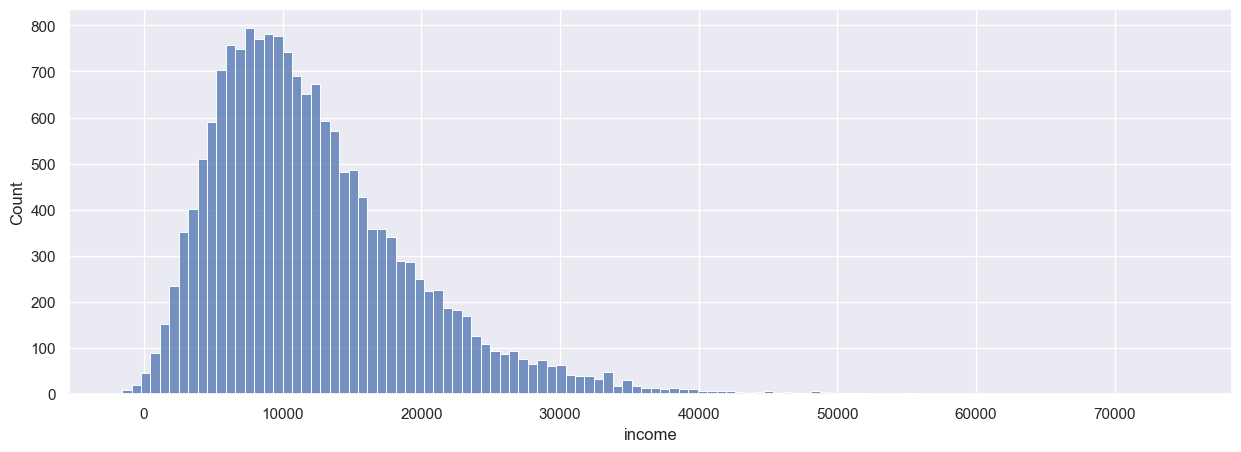

In [131]:
plt.figure(figsize=(15,5))
sns.histplot(x='income',data=dfn)

In [132]:
import scipy
from scipy import stats

x = dfn['income']

ks_results = scipy.stats.kstest(x, cdf='norm')

matrix_ks = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['Sample Data', len(x) - 1, ks_results[0], ks_results[1]]
]
matrix_ks

[['', 'DF', 'Test Statistic', 'p-value'],
 ['Sample Data', 17198, 0.9975579975579976, 0.0]]

Rechazamos la hipótesis de Normalidad. La variable objetivo 'income' no se distribuye bajo una distribución normal.

Veamos ahora cómo se comporta la variable 'income' en función de las distintas variables independientes

<AxesSubplot:xlabel='prov', ylabel='income'>

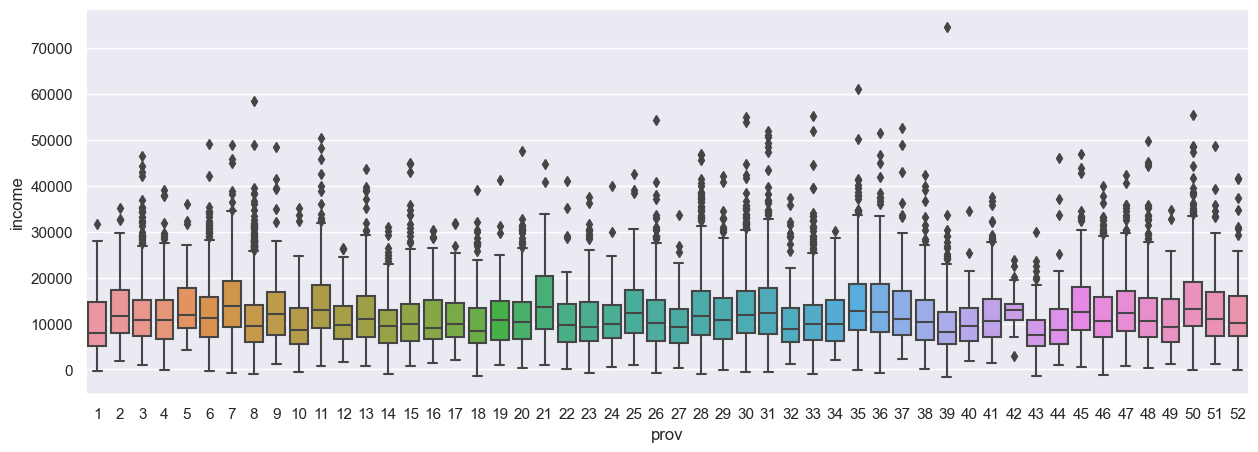

In [133]:
plt.figure(figsize=(15,5))
sns.boxplot(x='prov',y='income',data=dfn)

<AxesSubplot:xlabel='ac', ylabel='income'>

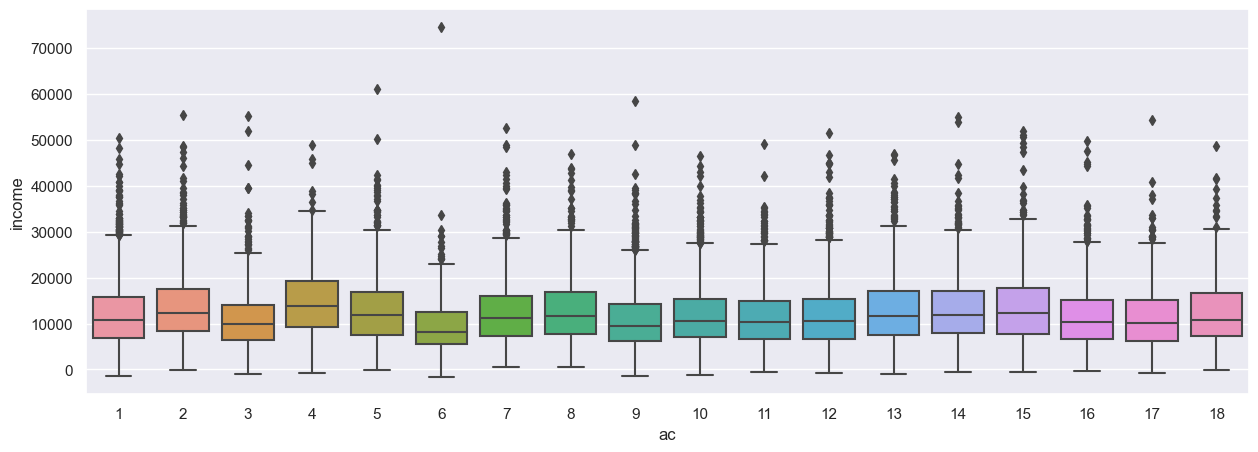

In [134]:
plt.figure(figsize=(15,5))
sns.boxplot(x='ac',y='income',data=dfn)

Observamos ligeras diferencias entre las medias de ingresos en función de las provincias y las comunidades autónomas. Por tanto, la variable provincia puede que tenga un cierto peso en los árboles que construiremos.

<AxesSubplot:xlabel='gen', ylabel='income'>

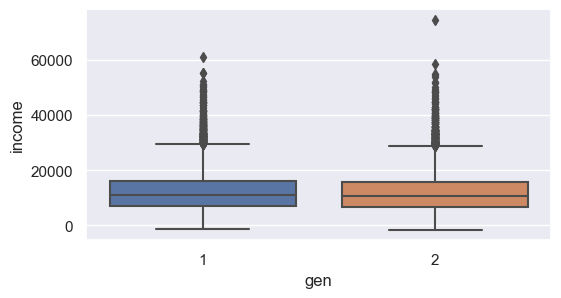

In [135]:
plt.figure(figsize=(6,3))
sns.boxplot(x='gen',y='income',data=dfn)

No existen diferencias significativas del nivel de ingresos respecto al género de las personas.

<AxesSubplot:xlabel='nat', ylabel='income'>

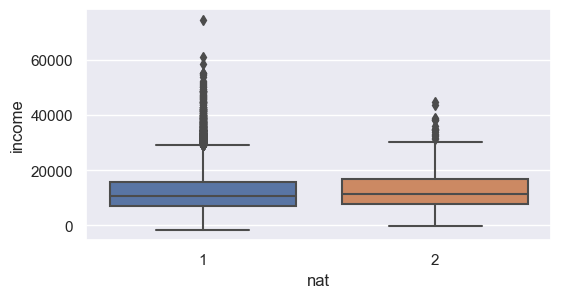

In [136]:
plt.figure(figsize=(6,3))
sns.boxplot(x='nat',y='income',data=dfn)

No existen diferencias significativas del nivel de ingresos respecto a la nacionalidad de las personas.

<AxesSubplot:xlabel='age', ylabel='income'>

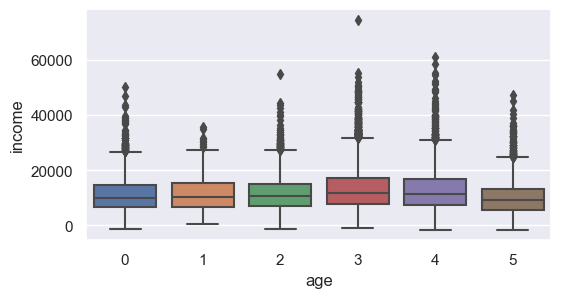

In [137]:
plt.figure(figsize=(6,3))
sns.boxplot(x='age',y='income',data=df)

En este gráfico no observamos diferencias significativas de ingresos respecto a la edad de las personas, pero sí un ligero incremento de ingresos al aumentar la edad de ellas. En el caso de las pesonas mayores de 65 (categoría 5), observamos como su media de ingresos es menor que el grupo anterior, lo que seguramente se deba a que la pensión que reciban sea menor que su último sueldo.

<AxesSubplot:xlabel='educ', ylabel='income'>

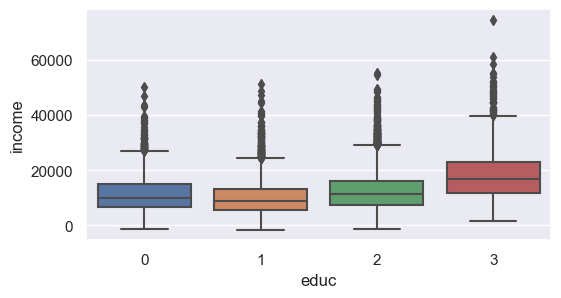

In [138]:
plt.figure(figsize=(6,3))
sns.boxplot(x='educ',y='income',data=df)

Se observan diferencias significatias entre los niveles de educación con respecto al nivel de ingresos, en el caso de haber cursado solo la educación obligatoria, o estudios superiores. Además, se observa que cuanto mayor es la educación de los individuos, mayor es el nivel de ingresos de estos. 

<AxesSubplot:xlabel='labor', ylabel='income'>

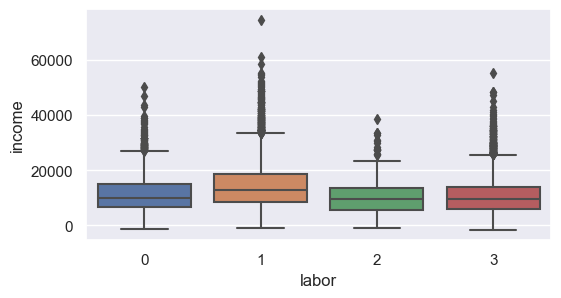

In [139]:
plt.figure(figsize=(6,3))
sns.boxplot(x='labor',y='income',data=dfn)

No se observan diferencias significativas entre las categorías de la variable 'labor', con respecto a la variable independiente 'income'. Sin embargo, como es de preever, la categoría con mayor media de ingresos es la correspondiente a las personas activas laboralmente

Veamos ahora las frecuencias de cada variable discreta através de histogramas.

<AxesSubplot:xlabel='prov', ylabel='Count'>

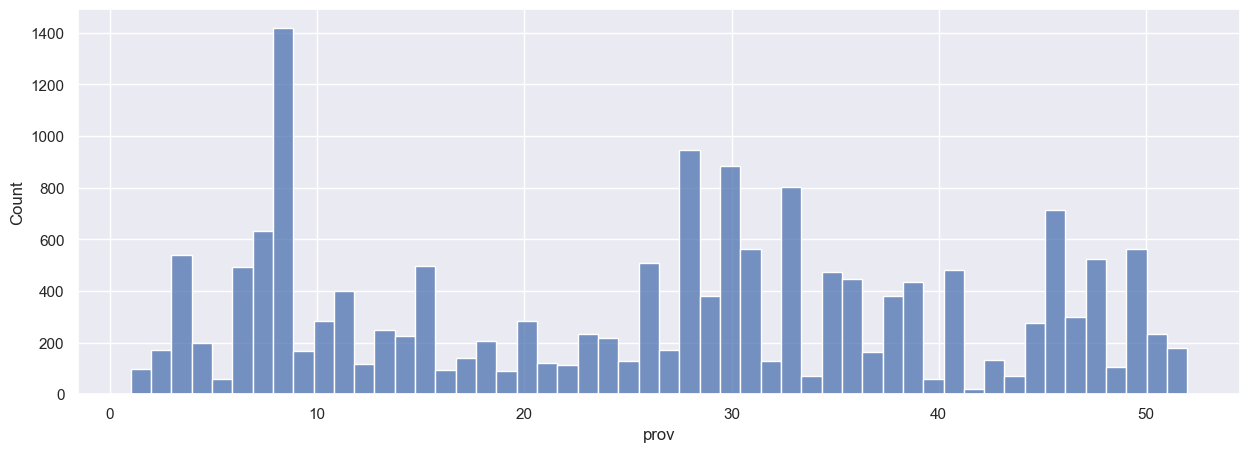

In [178]:
plt.figure(figsize=(15,5))
sns.histplot(x='prov',data=dfn, bins=52)

<AxesSubplot:xlabel='ac', ylabel='Count'>

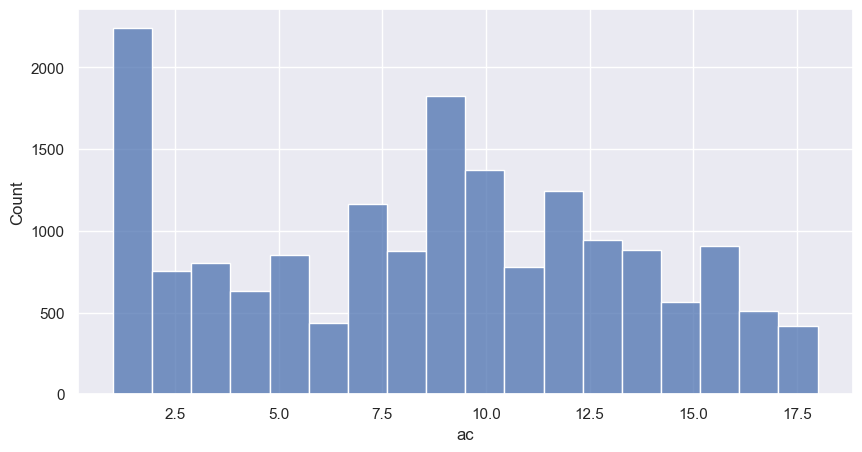

In [179]:
plt.figure(figsize=(10,5))
sns.histplot(x='ac',data=dfn, bins=18)

<AxesSubplot:xlabel='gen', ylabel='Count'>

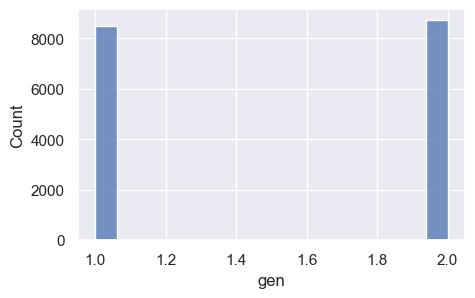

In [186]:
plt.figure(figsize=(5,3))
sns.histplot(x='gen',data=dfn)

<AxesSubplot:xlabel='nat', ylabel='Count'>

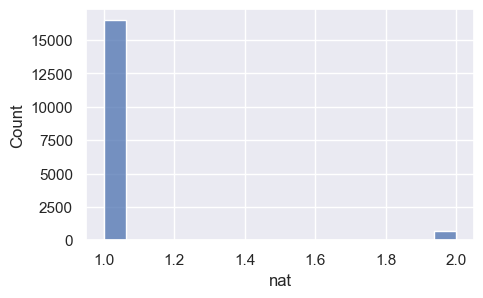

In [187]:
plt.figure(figsize=(5,3))
sns.histplot(x='nat',data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

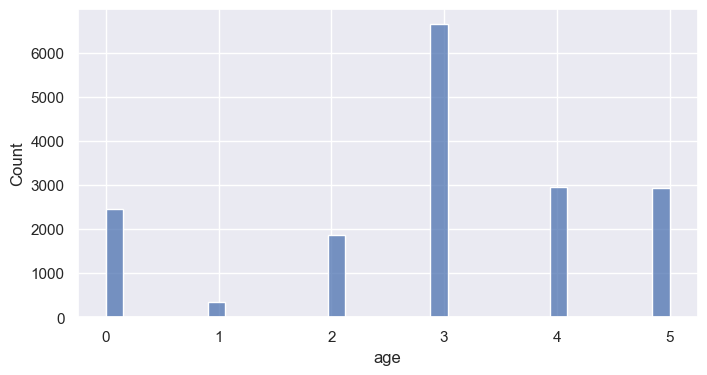

In [188]:
plt.figure(figsize=(8,4))
sns.histplot(x='age',data=df)

<AxesSubplot:xlabel='educ', ylabel='Count'>

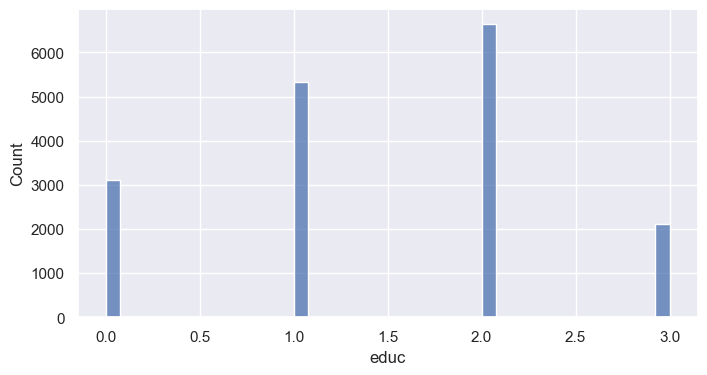

In [189]:
plt.figure(figsize=(8,4))
sns.histplot(x='educ',data=df)

<AxesSubplot:xlabel='labor', ylabel='Count'>

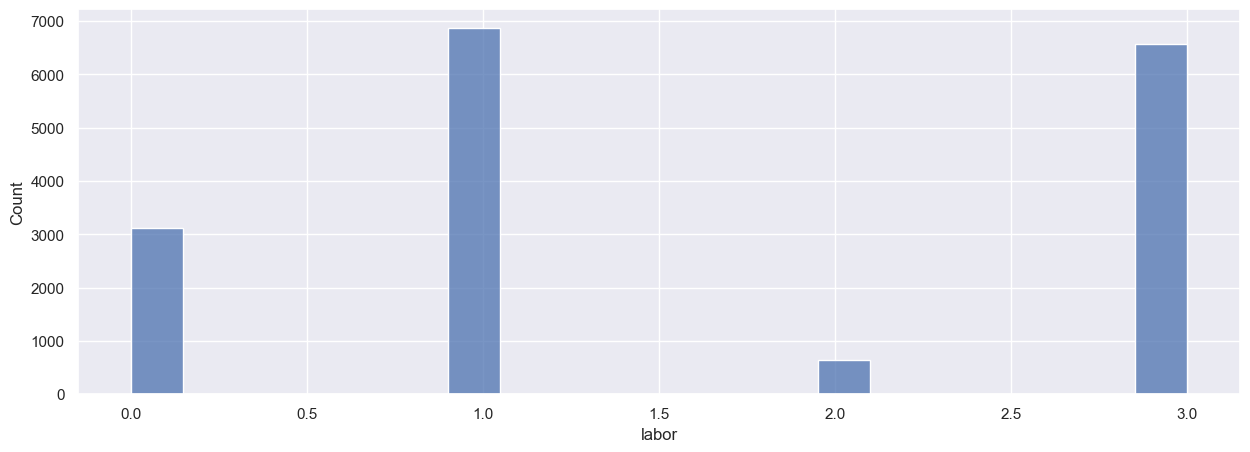

In [146]:
plt.figure(figsize=(15,5))
sns.histplot(x='labor',data=dfn)

Veamos ahora las relaciones de dependencia entre las variables independientes y la variable dependiente, a través del mutual information:

In [169]:
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif

a = mutual_info_classif(dfn['income'].to_frame(), dfn['prov'], discrete_features=[False])
b = mutual_info_classif(dfn['income'].to_frame(), dfn['ac'], discrete_features=[False])
c = mutual_info_classif(dfn['income'].to_frame(), dfn['gen'], discrete_features=[False])
d = mutual_info_classif(dfn['income'].to_frame(), dfn['nat'], discrete_features=[False])
e = mutual_info_classif(dfn['income'].to_frame(), df['labor'], discrete_features=[False])
f = mutual_info_classif(dfn['income'].to_frame(), df['age'], discrete_features=[False])
g = mutual_info_classif(dfn['income'].to_frame(), df['educ'], discrete_features=[False])
mutual_info = [a,b,c,d,e,f,g]
mutual_info

[array([0.02381297]),
 array([0.01429372]),
 array([0.00115395]),
 array([0.00052785]),
 array([0.02860253]),
 array([0.00684368]),
 array([0.04835952])]

La variable con menor relación de dependencia con la variable 'income' es la referente al género, por lo que esta variable tiene una peso muy bajo a la hora de determinar los ingresos de una persona. Esto se debería reflejar en el árbol que posteriormente construiremos, de forma que aparezca en los últimos nodos, o que incliso no aparezca en el árbol debido a su baja influencia en la variable dependiente. 
Las variables con más relación de dependencia con la variable 'income', y por tanto las que más pueden influir en su valor son las referentes a la situación laboral y a la educación, como ya habíamos sospechado en los Box-Plot. Veremos si estas dos variables aparecen en los primeros nodos del árbol que construiremos.

In [149]:
df['weight'].sum()

43162486.01966001

Vemos que la suma de los pesos de cada observación corresponde con el total de la población española.
Para nuestro problema de árboles de decisión no tendremos en cuenta los pesos de cada observación, por tanto eliminamos la variables 'weight'. 

In [150]:
dfn = dfn.drop(['weight'], axis=1)

In [151]:
dfn.head()

,prov,ac,gen,nat,labor,age2,age3,age4,age5,educ1,educ2,educ3,income
1,1,16,2,2,3,0,0,0,1,0,1,0,12021.832116
2,1,16,1,1,1,0,1,0,0,0,1,0,8609.853817
3,1,16,1,1,1,0,0,0,1,0,1,0,3384.197292
4,1,16,1,1,0,0,0,0,1,0,0,0,2343.355200
5,1,16,1,1,1,0,1,0,0,1,0,0,9023.845796


Así queda nuestro dataframe preprocesado.

Convertimos ahora el dataframe preprocesado en un archivo CSV, con el que trabajaremos en R.

In [155]:
dfn.to_csv('incomedata_procesado.csv', index=False)